In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterSampler
import random

In [34]:
#Long Term energy forecasting

In [2]:
#Data Preprocessing

In [3]:
#Importing DataSet1
df1=pd.read_csv("Daily_Power_Gen_Source_march_23.csv")

In [4]:
df_total=df1[df1['source'] == 'Total']

In [5]:
df_total['date'] = pd.to_datetime(df_total['date'])

C:\Users\raaje\AppData\Local\Temp\ipykernel_13392\252728851.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_total['date'] = pd.to_datetime(df_total['date'])
C:\Users\raaje\AppData\Local\Temp\ipykernel_13392\252728851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['date'] = pd.to_datetime(df_total['date'])


In [6]:
df_total.set_index('date', inplace=True)

In [7]:
df_total.head()

,source,NR,WR,SR,ER,NER,All India
date,,,,,,,
2013-03-31,Total,675.0,820.0,697.0,306.0,28.0,2526
2013-01-04,Total,683.0,841.0,706.0,316.0,29.0,2575
2013-02-04,Total,675.0,836.0,709.0,311.0,28.0,2558
2013-03-04,Total,676.0,835.0,705.0,307.0,28.0,2551
2013-04-04,Total,691.0,856.0,711.0,302.0,26.0,2586


In [8]:
# dataset with 'All India' as the target and other features
# Drop the non-numeric and non-feature columns (if any)
X = df_total.drop(['All India', 'source'], axis=1)  
y = df_total['All India']

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Reshape the data for Conv1D input [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [9]:
def create_model(input_shape, filters, kernel_size, optimizer):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [13]:
def train_evaluate(params):
    # Create the model with the provided architecture parameters
    model = create_model(input_shape=(X_train.shape[1], 1), filters=params['filters'], kernel_size=params['kernel_size'], optimizer=params['optimizer'])

    # Train the model with the specified training parameters
    model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    # Evaluate the model on the test set
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

In [14]:
param_dist = {
    'filters': [32, 64, 128],
    'kernel_size': [2, 3, 4],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 50]
}

# Generate a number of random samples
param_list = list(ParameterSampler(param_dist, n_iter=10, random_state=42))

# Initialize the best score and best params
best_score = float('inf')
best_params = None

# Perform Random Search
for params in param_list:
    mse = train_evaluate(params)
    if mse < best_score:
        best_score = mse
        best_params = params
print("Best MSE:", best_score)
print("Best Hyperparameters:", best_params)

C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [15]:
# Train the best model with the found parameters
best_model = create_model(input_shape=(X_train.shape[1], 1), filters=best_params['filters'], kernel_size=best_params['kernel_size'], optimizer=best_params['optimizer'])
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/10


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0300e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3752e-05
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0156e-05
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0656e-06
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3569e-06
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4294e-06
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9266e-06
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4478e-06
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7905e-06


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


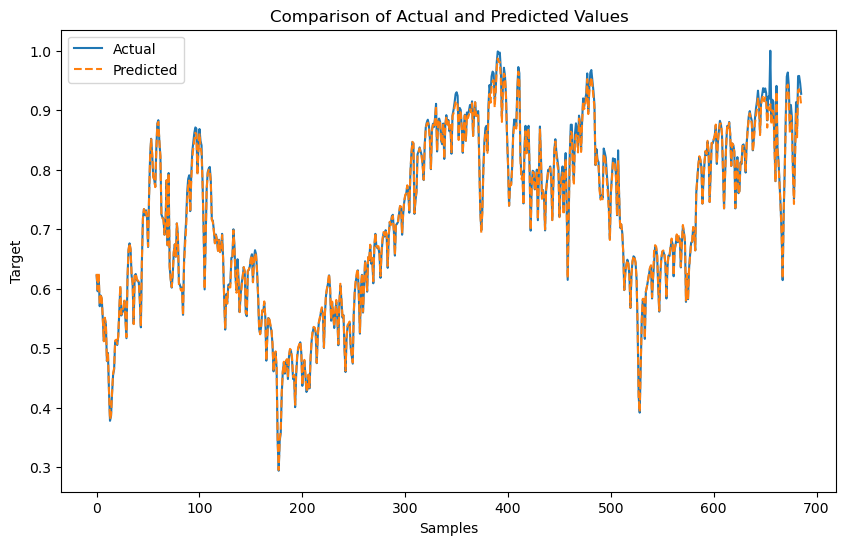

In [16]:
import matplotlib.pyplot as plt

# Assuming you have a separate test set or split
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Target')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [18]:
predictions = best_model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [19]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE
    mad = np.mean(np.abs(y_true - np.median(y_pred)))  # MAD

    return mse, rmse, mae, mape, mad

In [20]:
# If y_test was scaled, make sure to inverse transform it to match the scale of predictions if needed
# y_test = scaler.inverse_transform(y_test)

mse, rmse, mae, mape, mad = calculate_metrics(y_test, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MAD: {mad}")

MSE: 4.330919144800026e-05
RMSE: 0.006580971922748209
MAE: 0.0037212125617454702
MAPE: 0.4794911718266265
MAD: 0.12413514126561226


In [21]:
# Mid term forecasting of electrical energy 

In [35]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

In [29]:
df1=pd.read_csv("Daily_Power_Gen_Source_march_23.csv")
df_total=df1[df1['source'] == 'Total']
df_total.drop(['source'], axis=1,inplace=True) 
df_total['date'] = pd.to_datetime(df_total['date'])
df_total.set_index('date', inplace=True)

C:\Users\raaje\AppData\Local\Temp\ipykernel_13392\403346724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.drop(['source'], axis=1,inplace=True)
C:\Users\raaje\AppData\Local\Temp\ipykernel_13392\403346724.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_total['date'] = pd.to_datetime(df_total['date'])
C:\Users\raaje\AppData\Local\Temp\ipykernel_13392\403346724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [30]:
df_total.head()

,NR,WR,SR,ER,NER,All India
date,,,,,,
2013-03-31,675.0,820.0,697.0,306.0,28.0,2526
2013-01-04,683.0,841.0,706.0,316.0,29.0,2575
2013-02-04,675.0,836.0,709.0,311.0,28.0,2558
2013-03-04,676.0,835.0,705.0,307.0,28.0,2551
2013-04-04,691.0,856.0,711.0,302.0,26.0,2586


In [36]:
# Assume you have 'All India' as the target variable
y = df_total['All India'].values
X = df_total.drop('All India', axis=1).values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Split the data for mid-term forecasting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

In [32]:
#Defining the Model and Training and Evaluation

In [42]:
def create_model(input_shape, filters, kernel_size, optimizer):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def train_evaluate(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

In [40]:
#Hyperperameter tuning

In [43]:
# Define the hyperparameter space
# Define the hyperparameter space
param_grid = {
    'filters': [32, 64, 128],
    'kernel_size': [2, 3, 4],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 50]
}

# Randomly sample configurations
n_iterations = 10
best_score = float('inf')
best_model = None
best_params = None

for _ in range(n_iterations):
    # Separate model architecture parameters from training parameters
    filters = random.choice(param_grid['filters'])
    kernel_size = random.choice(param_grid['kernel_size'])
    optimizer = random.choice(param_grid['optimizer'])
    batch_size = random.choice(param_grid['batch_size'])
    epochs = random.choice(param_grid['epochs'])
    
    # Create model only with architecture parameters
    model = create_model((X_train.shape[1], 1), filters, kernel_size, optimizer)
    
    # Evaluate the model with training parameters
    mse = train_evaluate(model, X_train, y_train, X_test, y_test, epochs, batch_size)

    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = {'filters': filters, 'kernel_size': kernel_size, 'optimizer': optimizer, 'batch_size': batch_size, 'epochs': epochs}

print("Best MSE:", best_score)
print("Best Hyperparameters:", best_params)

C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\raaje\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Best MSE: 2.3782719344481137e-06
Best Hyperparameters: {'filters': 128, 'kernel_size': 3, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 50}


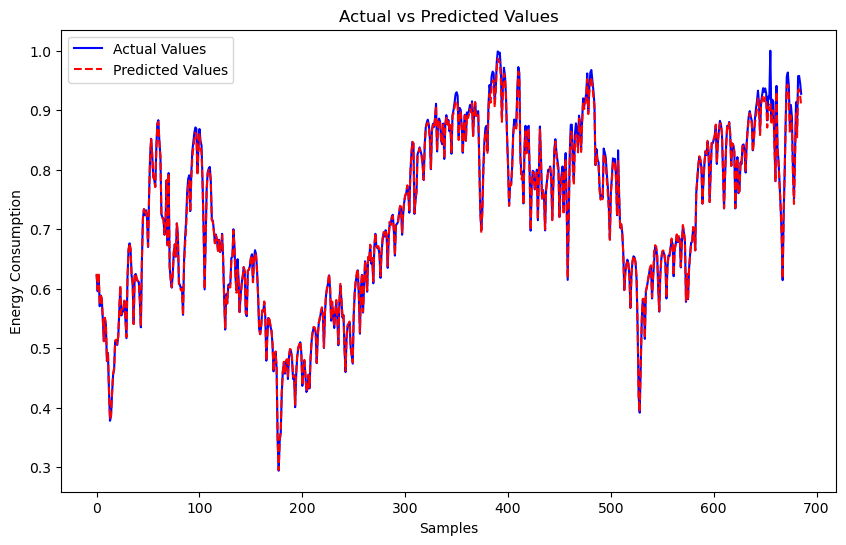

In [44]:
import matplotlib.pyplot as plt

# Ensure predictions and actual values are scaled back if they were normalized
# If 'scaler' was used to normalize 'y_test', you should inverse transform both 'y_test' and 'predictions'
# y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
# predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', linestyle='--', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
df1 = pd.read_csv('Daily_Power_Gen_Source_march_23.csv')

df_total=df1[df1['source'] == 'Total']

df_total.drop(['source'], axis=1,inplace=True)

df_total['date'] = pd.to_datetime(df_total['date'])
df_total.set_index('date', inplace=True)

# Assume 'All India' is the target variable
y = df_total['All India'].values
X = df_total.drop('All India', axis=1).values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Assuming best_model is your trained model
predictions = best_model.predict(X_test)

# Inverse transform predictions and actual values
predictions_inv = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\raaje\AppData\Local\Temp\ipykernel_13392\2726618798.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.drop(['source'], axis=1,inplace=True)
C:\Users\raaje\AppData\Local\Temp\ipykernel_13392\2726618798.py:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_total['date'] = pd.to_datetime(df_total['date'])
C:\Users\raaje\AppData\Local\Temp\ipykernel_13392\2726618798.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [48]:
def evaluate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if np.any(y_true) else float('inf')
    mad = np.mean(np.abs(y_true - np.median(y_pred)))
    return mse, rmse, mae, mape, mad

# Calculate evaluation metrics
mse, rmse, mae, mape, mad = evaluate_metrics(y_test_inv, predictions_inv)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MAD: {mad}")

MSE: 16.362622621803173
RMSE: 4.0450738709945915
MAE: 2.632060860058311
MAPE: 0.06399879583672653
MAD: 325.60899348578715


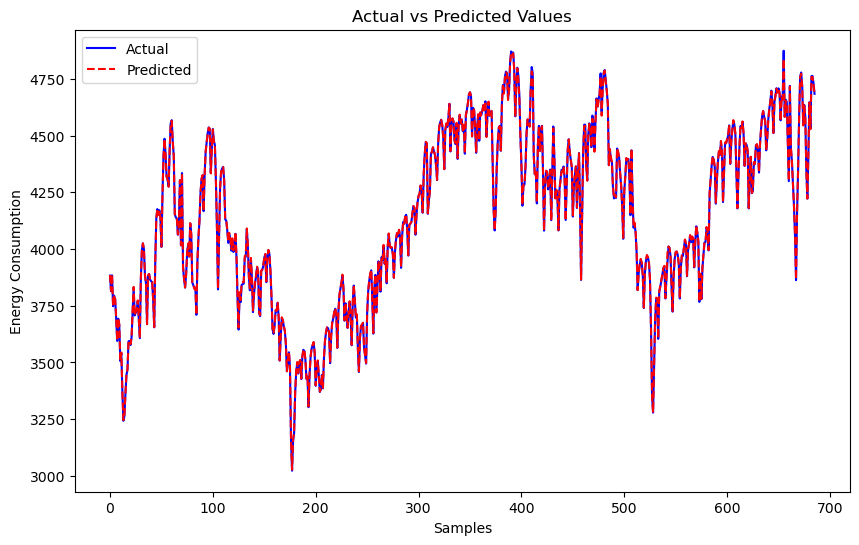

In [49]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(predictions_inv, label='Predicted', linestyle='--', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()